In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

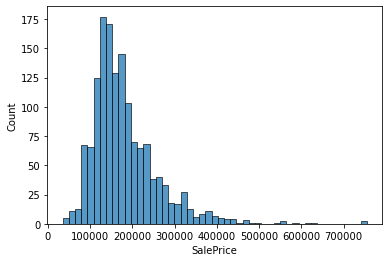

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
train['SalePrice'].describe()
sns.histplot(train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

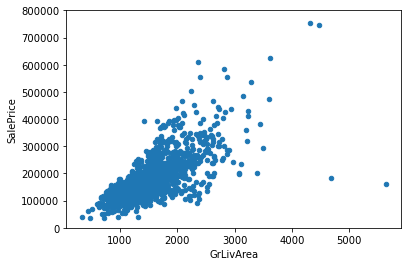

In [12]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

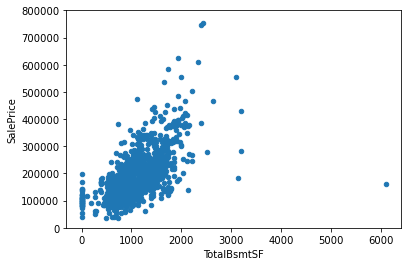

In [13]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

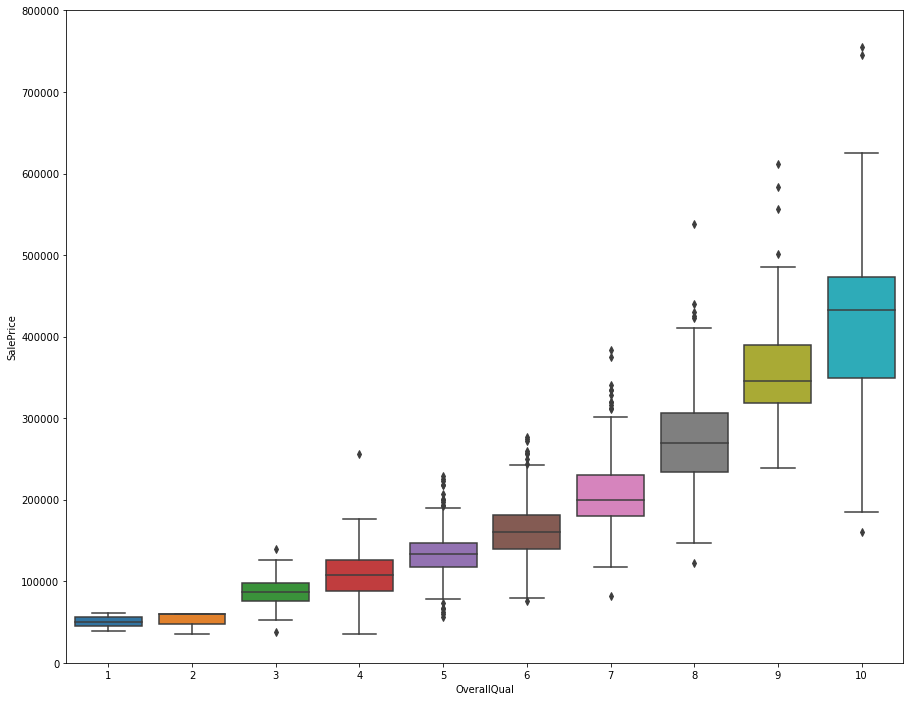

In [22]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis =1)
fig,ax = plt.subplots(figsize = (15,12))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

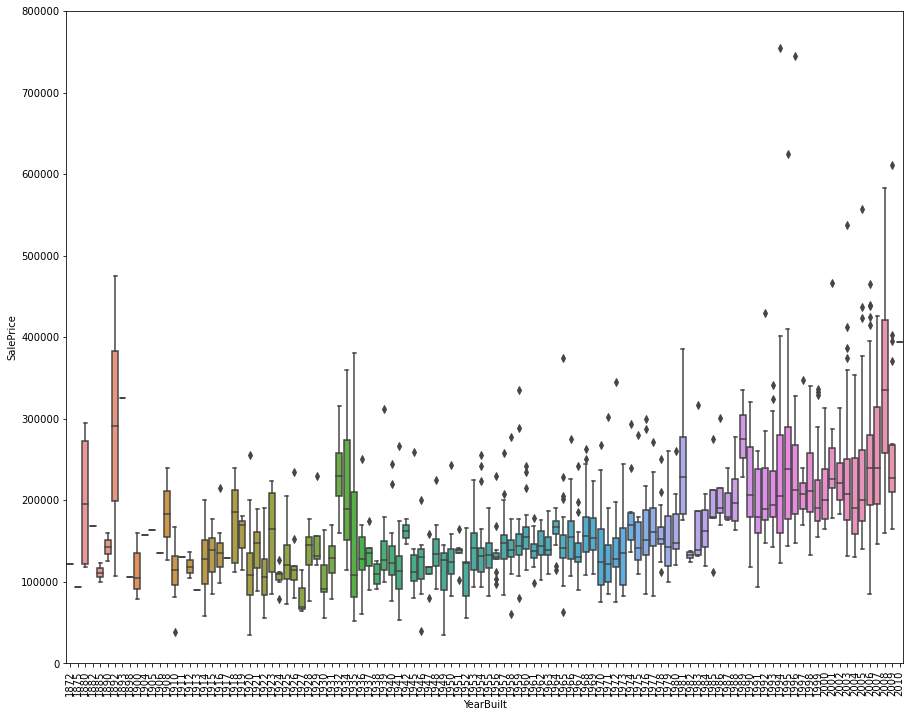

In [25]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]],axis =1)
f,ax = plt.subplots(figsize = (15,12))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation =90)


<AxesSubplot:>

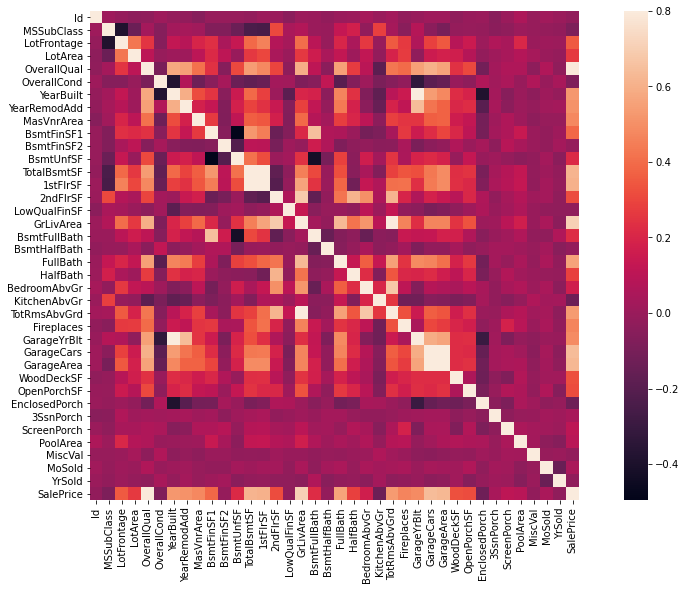

In [28]:
#Correlation matrix
corrmap = train.corr()
f,ax = plt.subplots(figsize = (16,9))
sns.heatmap(corrmap,vmax=.8,square=True)

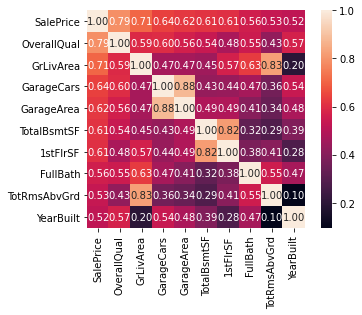

In [38]:
k =10 
cols=corrmap.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


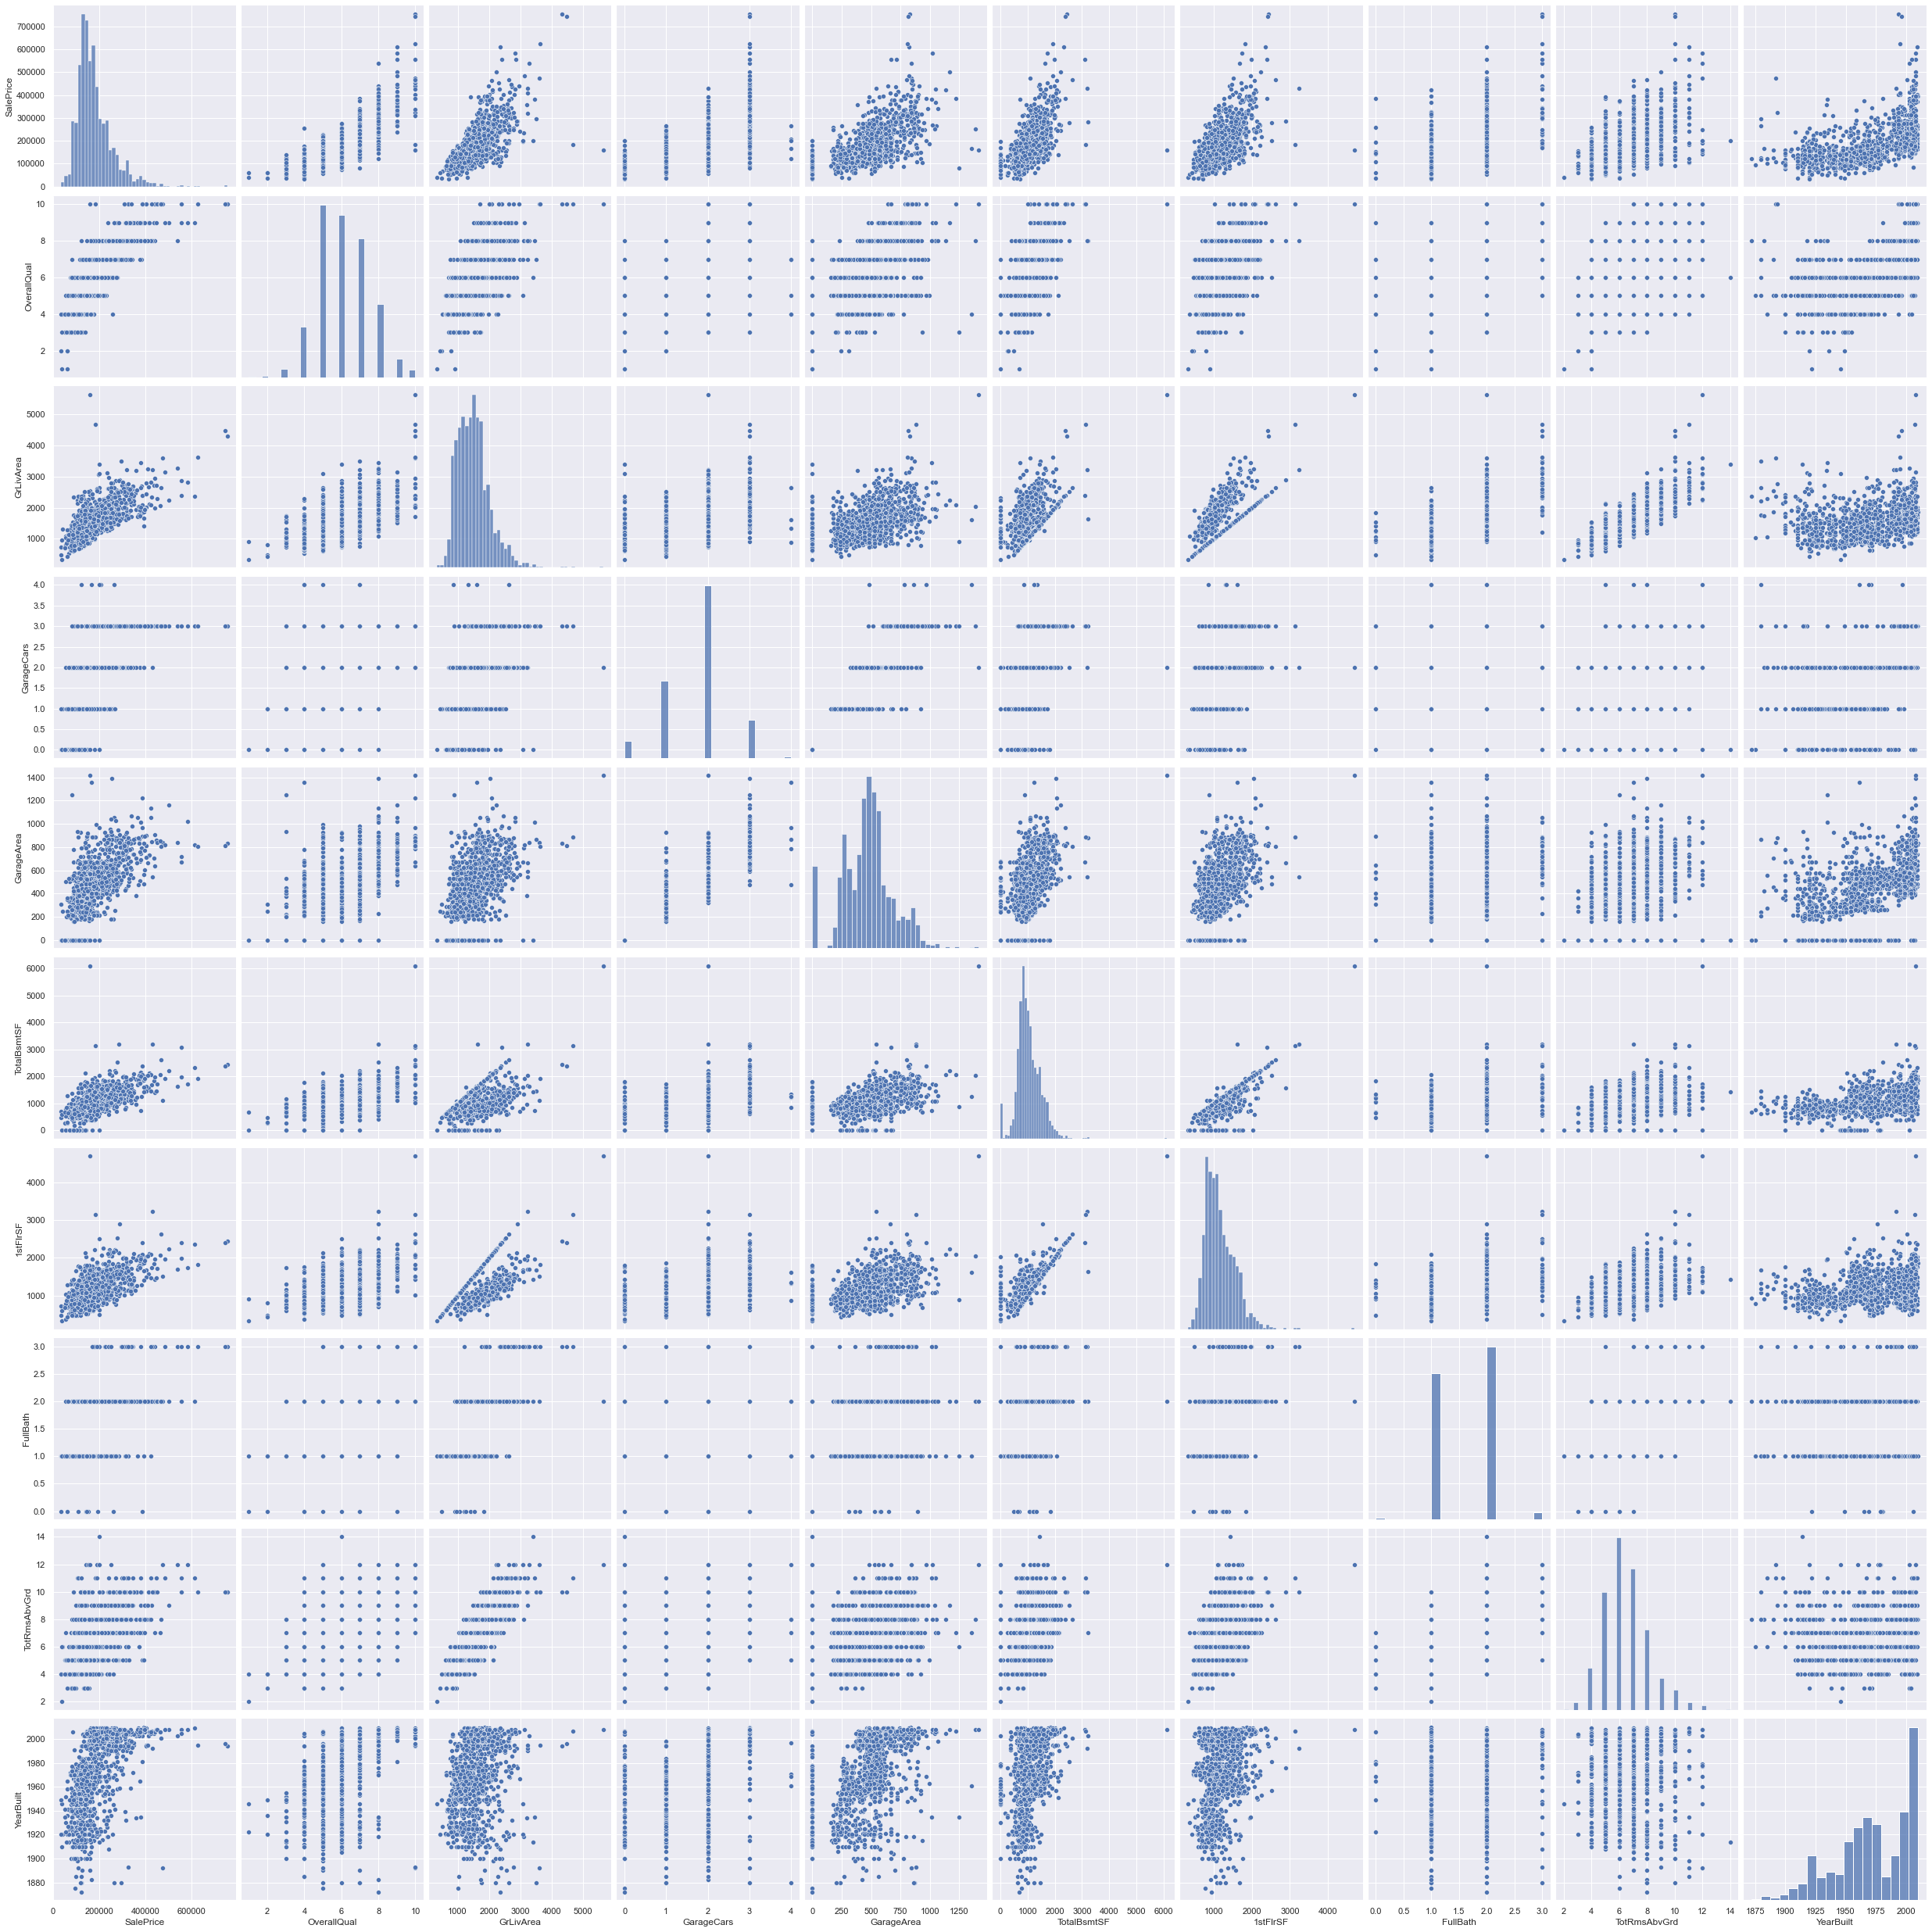

In [46]:
sns.pairplot(train[cols],height = 3.5)

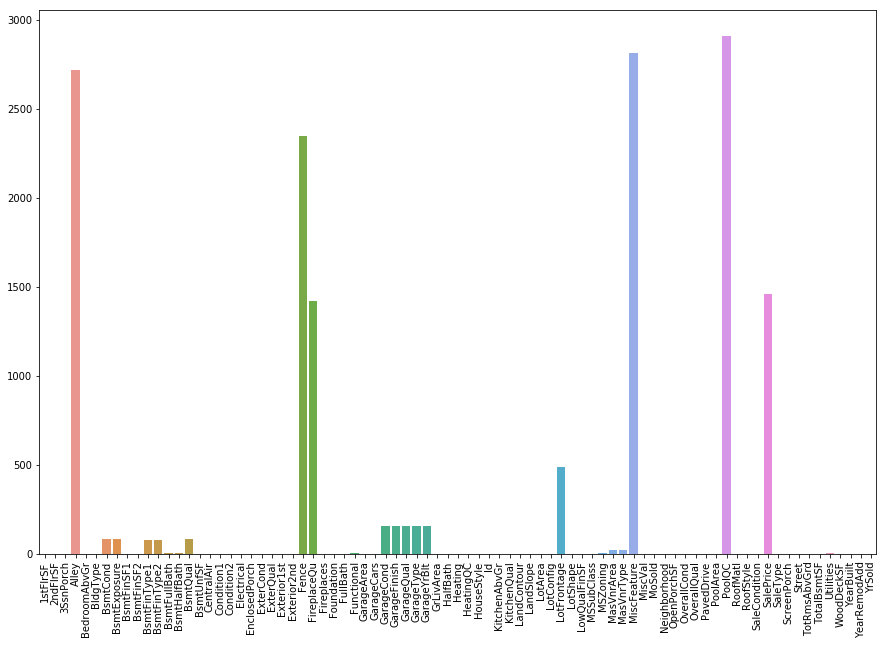

In [50]:
#处理缺失值
plt.figure(figsize = (15,10))#调整画布大小
plt.xticks(rotation = 90) # 更改坐标轴上的文字朝向，旋转90°
sns.barplot(df.columns,df.isna().sum()) #可视化缺失值

In [89]:
#missing data 
total = train.isnull().sum().sort_values(ascending=False)
percent = (total / train.isnull().count()).sort_values(ascending=False)
miss_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

drop_cols =miss_data[miss_data['Total'] > 1].index
train=train.drop(drop_cols,1)
train=train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [90]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [98]:
#标准化
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])



D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[-0.56557677],
       [ 1.33632049],
       [-0.45228618],
       [-1.21385071],
       [ 0.05122755],
       [-0.07465088],
       [ 0.36592364],
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

[(0.0, 800000.0)]

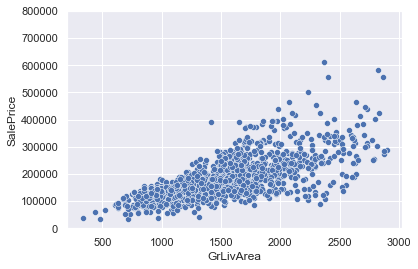

In [125]:
#删除 outliars
g=sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'])
g.set(ylim=(0,800000))

[(0.0, 800000.0)]

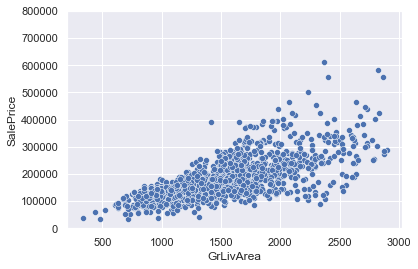

In [124]:
index=train.sort_values(by = 'GrLivArea', ascending=False)[:2].index
train=train.drop(index)

g=sns.scatterplot(x='GrLivArea',y="SalePrice",data=train)
g.set(ylim=(0,800000))

D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


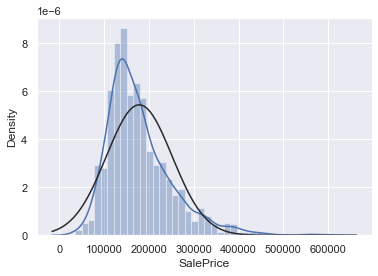

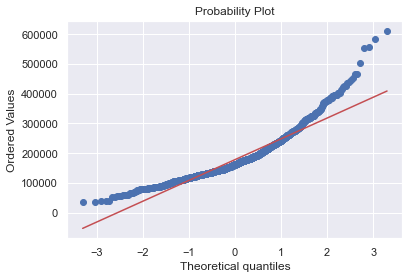

In [136]:
sns.distplot(train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot= plt)

D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


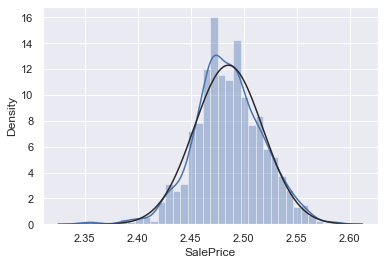

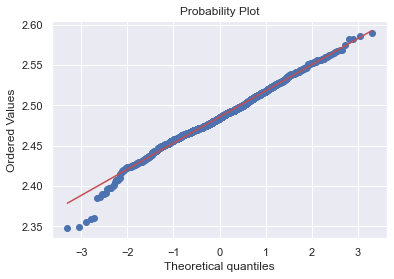

In [138]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot= plt)

In [139]:
pd.get_dummies(train)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
